In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [35]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 220, 220, 128)     36992     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 110, 110, 128)     0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 110, 110, 128)     0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 108, 108, 64)      73792     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 54, 54, 64)       

In [37]:
train_datagen = image.ImageDataGenerator(rescale = 1./255, shear_range = 0.2,zoom_range = 0.2, horizontal_flip = True)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [38]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [39]:
hist_new = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/10
8/8 [==============================] - 87s 11s/step - loss: 0.9859 - accuracy: 0.5586 - val_loss: 0.6590 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 85s 11s/step - loss: 0.5413 - accuracy: 0.7031 - val_loss: 0.4960 - val_accuracy: 0.7333
Epoch 3/10
8/8 [==============================] - 81s 10s/step - loss: 0.4355 - accuracy: 0.8086 - val_loss: 0.5215 - val_accuracy: 0.8833
Epoch 4/10
8/8 [==============================] - 83s 10s/step - loss: 0.3409 - accuracy: 0.8867 - val_loss: 0.1301 - val_accuracy: 0.9333
Epoch 5/10
8/8 [==============================] - 79s 10s/step - loss: 0.1877 - accuracy: 0.9297 - val_loss: 0.1835 - val_accuracy: 0.9000
Epoch 6/10
8/8 [==============================] - 85s 11s/step - loss: 0.1891 - accuracy: 0.9453 - val_loss: 0.0865 - val_accuracy: 0.9667
Epoch 7/10
8/8 [==============================] - 84s 11s/step - loss: 0.1769 - accuracy: 0.9219 - val_loss: 0.1316 - val_accuracy: 0.9667
Epoch 8/10
8/8 [===========

In [40]:
summary=hist.history
print(summary)

{'val_loss': [5.476156711578369, 8.214235305786133, 6.571388244628906, 9.857081413269043, 5.476156711578369, 8.214235305786133, 7.119003772735596, 6.023772716522217, 8.214235305786133, 6.023772716522217], 'val_accuracy': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'loss': [7.846305787563324, 7.546828627586365, 7.786410331726074, 7.486932873725891, 7.54682856798172, 7.966096818447113, 7.486933052539825, 7.906201183795929, 7.367141962051392, 7.8463059067726135], 'accuracy': [0.48828125, 0.5078125, 0.4921875, 0.51171875, 0.5078125, 0.48046875, 0.51171875, 0.484375, 0.51953125, 0.48828125]}


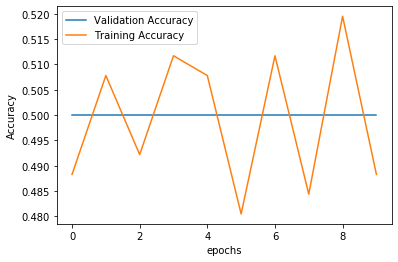

In [42]:
plt.plot(summary["val_accuracy"],label="Validation Accuracy")
plt.plot(summary["accuracy"],label="Training Accuracy")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.show()

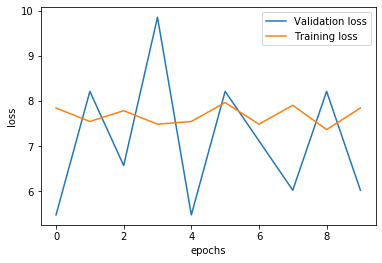

In [45]:
plt.plot(summary["val_loss"],label="Validation loss")
plt.plot(summary["loss"],label="Training loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [46]:
model.save("model_covid.h5")

In [48]:
model.evaluate_generator(train_generator)

[0.11957968026399612, 0.9642857313156128]

In [50]:
print(model.evaluate_generator(validation_generator))

[0.034558333456516266, 0.9666666388511658]


In [51]:
import os
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [52]:
y_actual, y_test = [],[]

In [55]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
    img=image.load_img("./CovidDataset/Val/Normal/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    p=model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(1)
    

In [56]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
    img=image.load_img("./CovidDataset/Val/Covid/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    p=model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(1)

In [57]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cn=confusion_matrix(y_actual,y_test)

ValueError: Found input variables with inconsistent numbers of samples: [60, 61]

In [61]:
sns.heatmap(cn,cmap="plasma",annot=True)

NameError: name 'cn' is not defined